In [1]:
#1.IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
#2.DATA CLEANING and REPLACING NULL VALUES
#as data set contains no null value but have ? that can be considered to be null response so replacing it.and then checking for null value possibility
df[df=='?']= np.nan

In [10]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [13]:
for x in ['workclass','occupation','native.country']:
  df[x].fillna(df[x].mode()[0],inplace=True)

In [14]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
#EDA - univariate, bivarite , multivariate
import matplotlib.ticker as mtick
%matplotlib inline

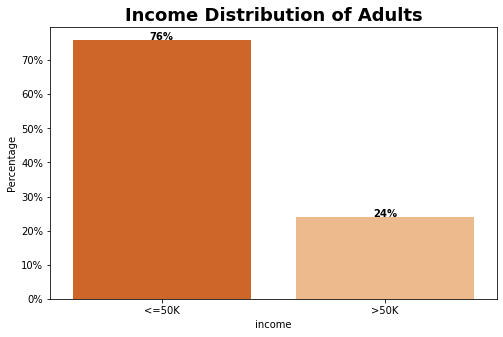

In [19]:
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Oranges_r')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1), ha='center', fontweight='bold')

In [ ]:
# here we can observe that percentage of earning more than 50k of amount are comprises 76% and less than 50k adult eaners are 24%

<AxesSubplot:title={'center':'Density of adults'}, ylabel='Density'>

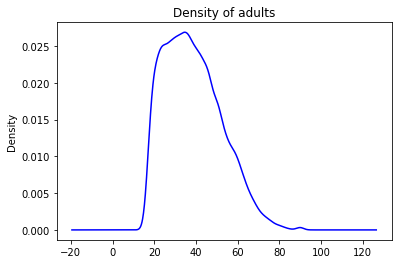

In [21]:
df['age'].plot(kind='kde',title='Density of adults', color='b')

In [ ]:
# comparing with the bell curve distribution we can observe assymmetric peak pointing positively skewed distribution.
# as we can observe density of ages of adult is between 30to 40 years

<AxesSubplot:title={'center':'Density plot for hours/week'}, ylabel='Density'>

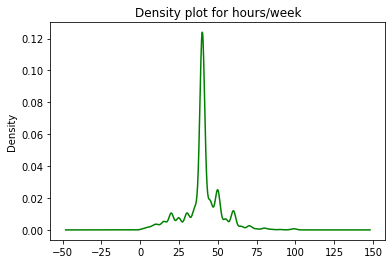

In [24]:
df['hours.per.week'].plot(kind='kde', title='Density plot for hours/week',color='g')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Income of Individuals of Different Age Groups')

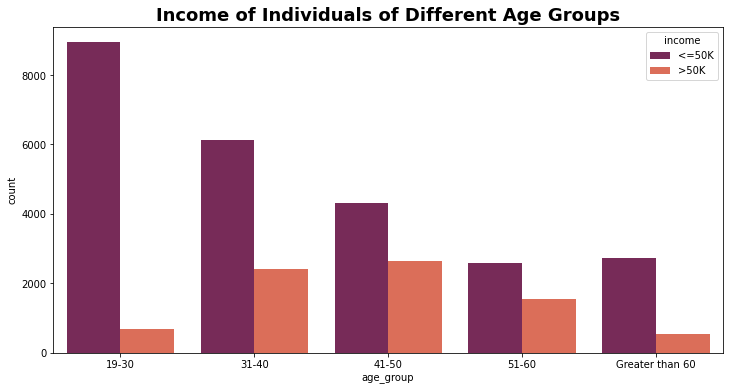

In [38]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', 'Greater than 60']
sns.countplot(df['age_group'], hue = df['income'], palette='rocket', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')

In [ ]:
# from above we can conclude that largest number of people earning more than 50k amount is of age between 41 to 50 years

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '5154'),
 Text(0, 0, '353'),
 Text(0, 0, '371'),
 Text(0, 0, '724'),
 Text(0, 0, '622'),
 Text(0, 0, '617'),
 Text(0, 0, ''),
 Text(0, 0, '')]

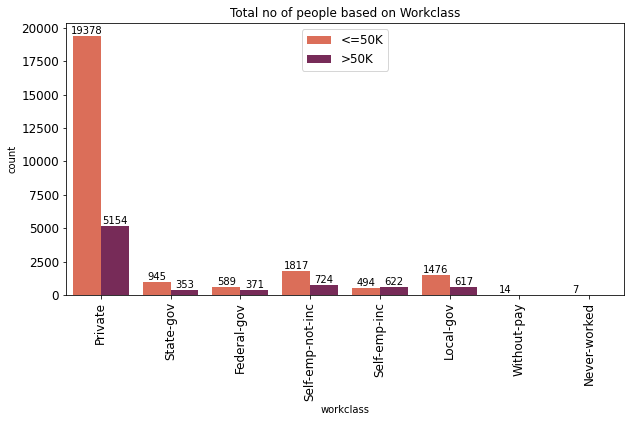

In [42]:
plt.figure(figsize=(10,5))

ax = sns.countplot(df['workclass'], hue = df['income'], palette='rocket_r')
plt.title('Total no of people based on Workclass', fontsize=12)
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [ ]:
# among workclass also in that who are private class workers earned more than 50k are in huge number
#  compared to other type of workers sucha as state gov workers
#sad to see there workclass had been working without pay also.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '1179'), Text(0, 0, '6662')]

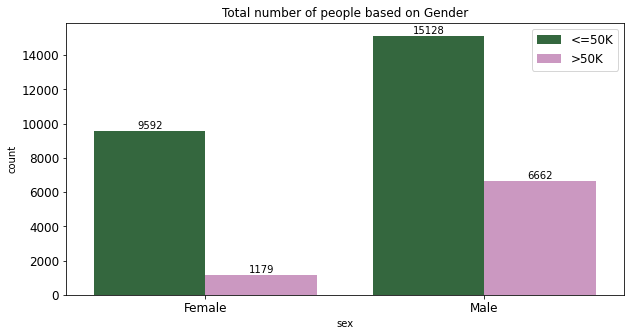

In [43]:
plt.figure(figsize=(10,5))

ax = sns.countplot(df['sex'], hue = df['income'], palette='cubehelix')
plt.title('Total number of people based on Gender', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

In [ ]:
#there are more numbers of males 50 k earners than female
#the disparity(gap) among male subject earning more than and less earning of 50k is less compared to female

In [31]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,Greater than 60
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,Greater than 60
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,Greater than 60
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,51-60
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-50


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

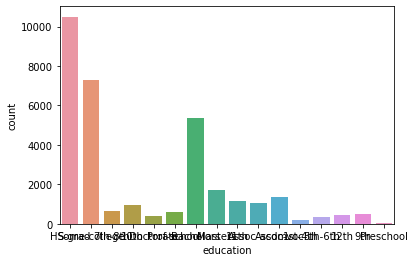

In [58]:
sns.countplot(df.education)

<AxesSubplot:title={'center':' Education-Num vs Hours per week'}, xlabel='education', ylabel='hours.per.week'>

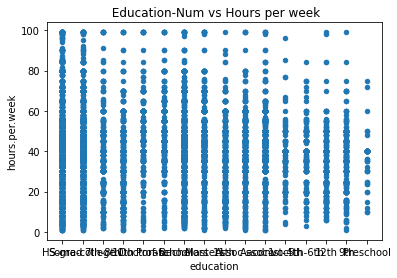

In [34]:
df.plot.scatter(x='education', y ='hours.per.week', 
                title =' Education-Num vs Hours per week')

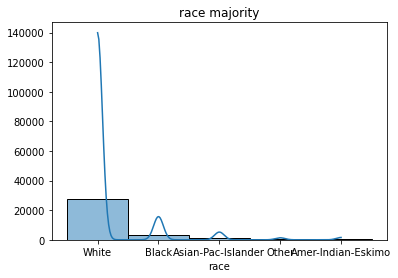

In [53]:
sns.histplot(data=df,x= 'race', kde =True)
plt.title('race majority')
plt.xlabel('race')
plt.ylabel('')
plt.show()

In [ ]:
#weights assigned  to white race is more compare to others so whites earning more than 50 k possibility cannot be rejected.

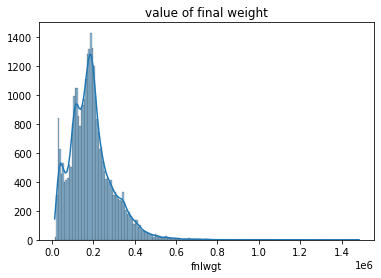

In [54]:
sns.histplot(data=df,x= 'fnlwgt', kde =True)
plt.title('value of final weight')
plt.xlabel('fnlwgt')
plt.ylabel('')
plt.show()

In [ ]:
#as above whites assigned with grater value of weights the value is plotted for it.

<AxesSubplot:title={'center':' Education vs capital gain'}, xlabel='education', ylabel='capital.gain'>

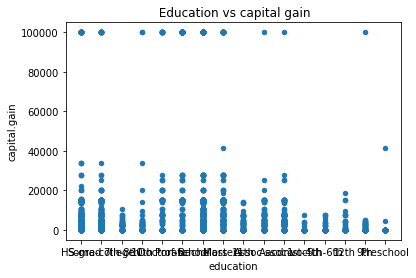

In [35]:
df.plot.scatter(x='education', y ='capital.gain', 
                title =' Education vs capital gain')

<AxesSubplot:title={'center':' hours-per-week vs capital-gain'}, xlabel='hours.per.week', ylabel='capital.gain'>

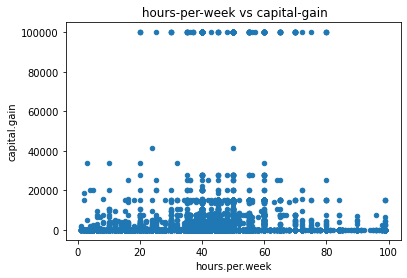

In [36]:
df.plot.scatter(x='hours.per.week', y ='capital.gain', 
                title =' hours-per-week vs capital-gain')

In [ ]:
# in this scatter plot we can see outlier in suc way that hrs per week between 20 to 80 has some outstanding figures related to capital gain

In [ ]:
plt.plot('')

<AxesSubplot:>

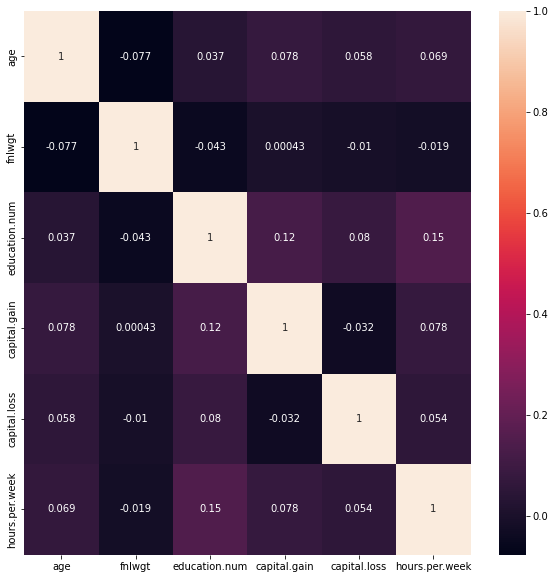

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# conclusion:
# 1.final weight as negative correlation with weight indicates that age do not compriese with the factors like socio economic characteristics.
# hence assigning weight to age could get negatively affected.
# 2.as age increases possibility to earn more than 50 k increase so final eight could be arranged in such way.